In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
#loading the dataset
survey=pd.read_csv("T Salary Survey EU 2019.csv")
survey.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


Visual assessment

In [6]:
survey.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')

In [8]:
survey.shape

(991, 23)

In [9]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Zeitstempel                                                                                           991 non-null    object 
 1   Age                                                                                                   882 non-null    float64
 2   Gender                                                                                                991 non-null    object 
 3   City                                                                                                  991 non-null    object 
 4   Seniority level                                                                                       97

In [10]:
#Looking for null values
survey.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

In [58]:
survey.dtypes

Zeitstempel                                                                                              object
Age                                                                                                     float64
Gender                                                                                                   object
City                                                                                                     object
Seniority level                                                                                          object
Position (without seniority)                                                                             object
Years of experience                                                                                       int64
Your main technology / programming language                                                              object
Yearly brutto salary (without bonus and stocks)                                                         

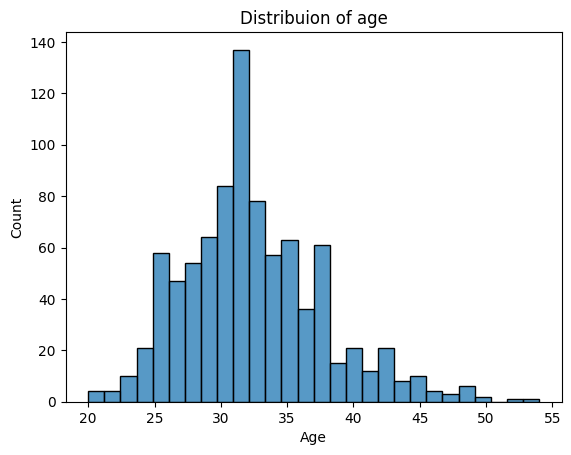

In [105]:
#To analyze the Distribution of age
sns.histplot(survey['Age'],kde=False)
plt.title('Distribuion of age')
plt.show()

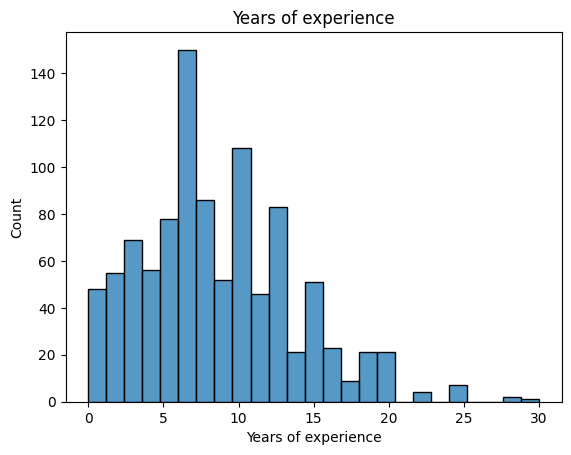

In [106]:
#To analyze the Distribution of Years of experience
sns.histplot(survey['Years of experience'],kde=False)
plt.title('Years of experience')
plt.show()

In [20]:
survey.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')

In [21]:
survey['Gender'].unique()

array(['Male', 'Female'], dtype=object)

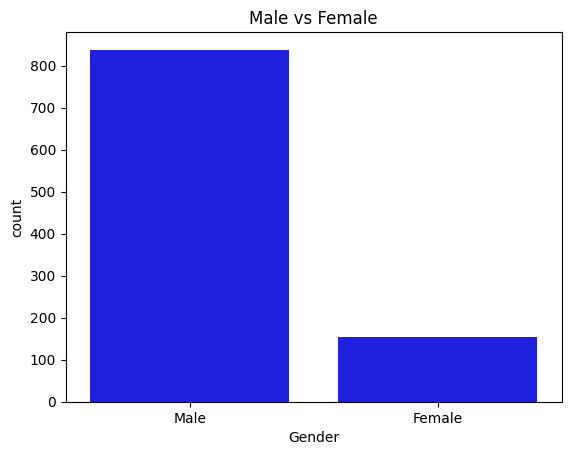

In [107]:
#Analysing how gender is distributed in the dataset
sns.countplot(x=survey['Gender'],color='blue')
plt.title('Male vs Female')
plt.show()

In [22]:
survey['Seniority level'].unique()

array(['Senior', 'Middle', 'Head', 'Lead', nan, 'Junior', 'Principal'],
      dtype=object)

In [23]:
survey['Company size'].unique()

array(['50-100', '10-50', '1000+', '100-1000', 'up to 10', nan],
      dtype=object)

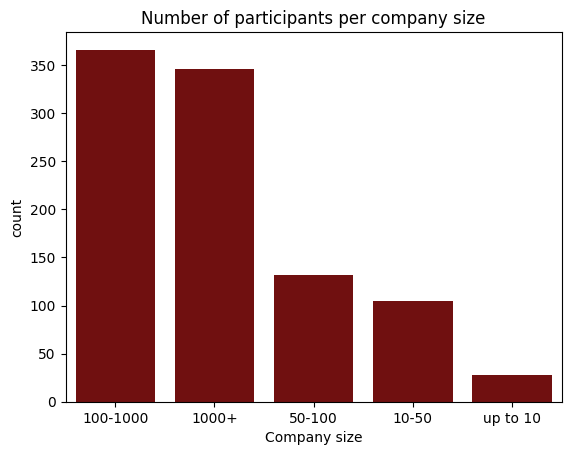

In [108]:
#Counting the number of participants per company size
size=survey['Company size'].value_counts()
size
sns.countplot(x=survey['Company size'],color='maroon',order=survey["Company size"].value_counts().index)
plt.title('Number of participants per company size')
plt.show()

In [38]:
survey['Company type'].unique()

array(['Startup', 'Product', nan, 'Consulting / Agency',
       'Bodyshop / Outsource', 'University', 'Bank', 'Outsource'],
      dtype=object)

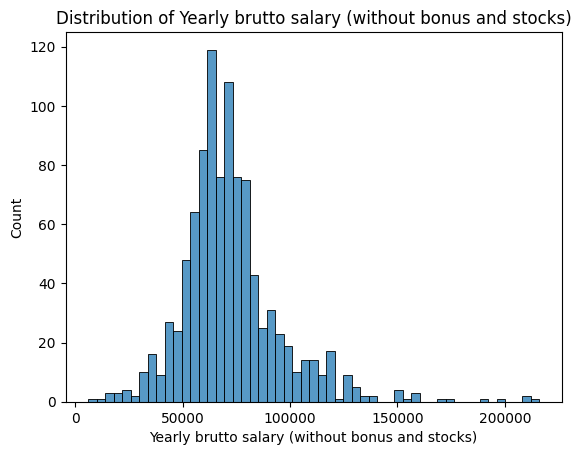

In [109]:
#Analysing the Distribution of Yearly brutto salary (without bonus and stocks
sns.histplot(survey['Yearly brutto salary (without bonus and stocks)'])
plt.title('Distribution of Yearly brutto salary (without bonus and stocks)')
plt.show()


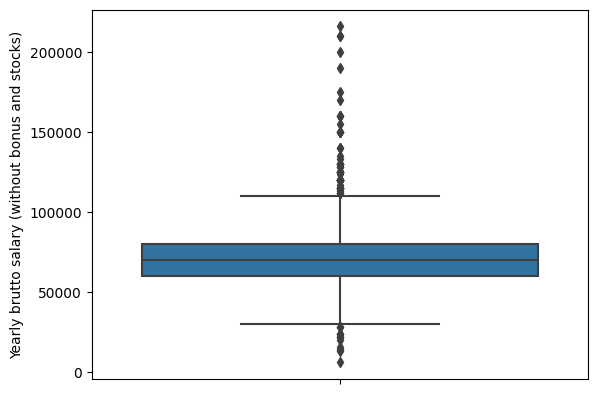

In [110]:
sns.boxplot(y="Yearly brutto salary (without bonus and stocks)", data=survey)
plt.show()


Data cleaning

In [111]:
#Making a copy of survey dataset to work with
survey19=survey.copy()

In [63]:
#Dropping irrelevant columns to my analysis
survey19.drop(['Zeitstempel','0','Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country','Yearly bonus one year ago. Only answer if staying in same country','Yearly stocks one year ago. Only answer if staying in same country','Number of home office days per month','Company name ','Yearly stocks','Yearly bonus','Number of home office days per month'],axis=1,inplace=True)

In [64]:
survey19.shape

(991, 14)

In [65]:
#Dropping rows with null values
survey19.dropna(axis=0,inplace=True)
survey19.sample(5)

,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Company business sector
605,32.0,Male,Berlin,Lead,Software Engineer,10,Not Relevant,83000.0,28.0,English,1000+,Product,unlimited,Transport
369,37.0,Male,Stuttgart,Senior,Software Architect,11,Not Relevant,105000.0,30.0,Deutsch,1000+,Product,unlimited,Automotive
418,29.0,Male,Munich,Junior,Data Scientist,2,Python,55000.0,30.0,Deutsch,10-50,Startup,unlimited,Finance / Insurance
358,33.0,Female,Berlin,Middle,QA,5,Ruby,63400.0,28.0,English,1000+,Product,unlimited,Catering
151,36.0,Male,Berlin,Senior,Fullstack Developer,15,Javascript / Typescript,70000.0,25.0,English,100-1000,Product,unlimited,Finance / Insurance


In [66]:
survey19.shape

(711, 14)

In [57]:
survey19['Company business sector'].unique()

array(['Tourism', 'Scientific Activities', nan, 'Transport', 'Automotive',
       'Сommerce', 'Coaching ', 'Finance / Insurance', 'Gaming',
       'Manufacture', 'Customer Support', 'Advertising', 'Health',
       'Fashion', 'IoT', 'Catering', 'Marketing', 'IT', 'Education',
       'SEO', 'Сonstruction', 'Design', 'Software Development', 'Justice',
       'Logistics', 'Entertainment', 'Telecom', 'Media', 'Gambling',
       'Publishing', 'HR', 'Real Estate', 'Dating', 'Government',
       'Security', 'Agriculture', 'Energy', 'SAS', 'Cloud',
       'Nature Conservation', 'Software development', 'Internet portal',
       'Data Processing', 'Consulting', 'Mapping, Navigation',
       'Blockchain', 'Analytics ', 'End-to-end analytics', 'OTT',
       'embedded', 'FinTech', 'Food Retail', 'CRM systems integration'],
      dtype=object)

In [67]:
survey19.head()

,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Number of vacation days,Main language at work,Company size,Company type,Сontract duration,Company business sector
0,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,29.0,English,50-100,Startup,unlimited,Tourism
1,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,22.0,English,10-50,Product,unlimited,Scientific Activities
3,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,24.0,English,100-1000,Product,unlimited,Transport
4,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,30.0,English,50-100,Product,unlimited,Automotive
5,33.0,Male,Berlin,Middle,Machine Learning Engineer,11,Python,80000.0,27.0,English,1000+,Product,unlimited,Сommerce


In [71]:
#Replacing Principal,Head and Lead roles with Senior in Seniority level column
name_dict = {
    'Lead': 'Senior',
    'Principal': 'Senior',
    'Head': 'Senior'
}

survey19['Seniority level'] = survey19['Seniority level'].replace(name_dict)


In [72]:
survey19['Seniority level'].unique()

array(['Senior', 'Middle', 'Junior'], dtype=object)

In [73]:
survey19['Position (without seniority)'].unique()

array(['Fullstack Developer', 'Backend Developer', 'Embedded Developer',
       'Machine Learning Engineer', 'Manager', 'Mobile Developer',
       'DevOps', 'Designer (UI, UX)', 'Frontend Developer',
       'Data Engineer', 'QA', 'Software Architect', 'Business Analyst',
       'Data Scientist', 'Localization', 'Support',
       'System Administrator', 'SRE', 'Software Engineer',
       'CTO (CEO, CFO)', 'SAP Consultant', 'Database Developer (DBA)',
       'Desktop/Unity3D Developer', 'Product Manager', 'Recruiter ',
       'Researcher', 'Cloud Platform Engineer', 'Sales Engineer',
       'Mainframe', 'NLP Engineer', 'Head of Engineering', 'Tech Lead',
       'Crypto Developer', 'Modelling Specialist', 'RPA developer',
       'Platform Engineer', 'IT Security', 'Network Engineer',
       'Game Developer', 'Backend Developer & Team Lead', 'support',
       'DevOps Manager', 'Solution Architect', 'Scrum Master',
       'Data Analyst', 'Desktop', 'Product manager', 'Security Engineer'],
 

Data exploration

In [100]:
#Analysing which postion has the highest salary and also the company business sector,years of experience and gender
salary=survey19[['Position (without seniority)','Gender','Years of experience','Company business sector','Yearly brutto salary (without bonus and stocks)']].nlargest(20,'Yearly brutto salary (without bonus and stocks)')
salary

,Position (without seniority),Gender,Years of experience,Company business sector,Yearly brutto salary (without bonus and stocks)
116,"CTO (CEO, CFO)",Male,12,Сommerce,210000.0
823,Backend Developer,Female,20,Telecom,200000.0
155,SAP Consultant,Male,14,Health,175000.0
778,Backend Developer,Male,12,Finance / Insurance,160000.0
810,Fullstack Developer,Male,15,Manufacture,160000.0
759,Fullstack Developer,Female,5,Health,155000.0
381,Mobile Developer,Male,20,Transport,150000.0
648,Crypto Developer,Male,20,Finance / Insurance,140000.0
424,Data Scientist,Male,13,Transport,135000.0
514,Data Scientist,Male,10,Transport,133000.0


In [89]:
#Analysing which postion has the highest average salary
salary = survey19.groupby('Position (without seniority)')['Yearly brutto salary (without bonus and stocks)'].mean().nlargest(20)
salary

Position (without seniority)
Crypto Developer                 140000.000000
CTO (CEO, CFO)                   107500.000000
SAP Consultant                   105750.000000
Tech Lead                        100000.000000
Head of Engineering               95000.000000
IT Security                       90000.000000
Software Architect                89262.068966
Backend Developer & Team Lead     89000.000000
DevOps Manager                    85000.000000
Manager                           83880.000000
Solution Architect                82000.000000
SRE                               79283.571429
Data Engineer                     73403.333333
Modelling Specialist              72000.000000
Security Engineer                 72000.000000
Software Engineer                 71250.000000
Machine Learning Engineer         71186.363636
Product manager                   71000.000000
Backend Developer                 70636.869318
Cloud Platform Engineer           70585.000000
Name: Yearly brutto salary (wit

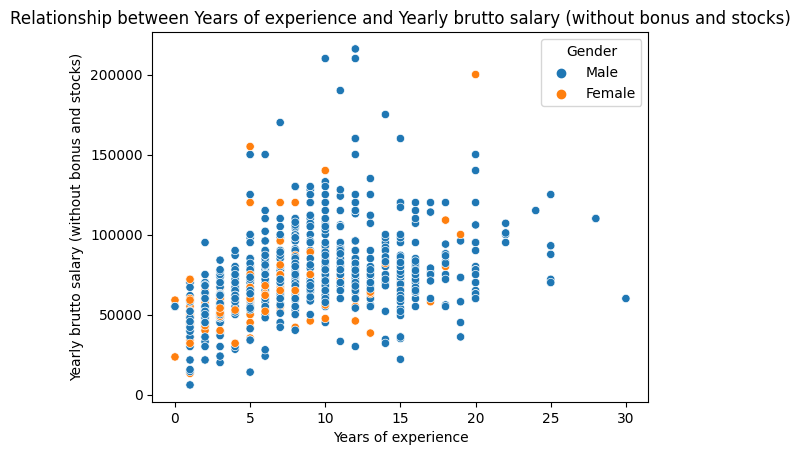

In [112]:
#Relationship between Years of experience and Yearly brutto salary (without bonus and stocks)
sns.scatterplot(x='Years of experience', y='Yearly brutto salary (without bonus and stocks)',hue='Gender',data=survey19)
plt.title('Relationship between Years of experience and Yearly brutto salary (without bonus and stocks)')
plt.show()


In [99]:

row = survey19.loc[survey19['Years of experience'] == 25].iloc[0]
row

Age                                                         44.0
Gender                                                      Male
City                                                      Berlin
Seniority level                                           Senior
Position (without seniority)                       Data Engineer
Years of experience                                           25
Your main technology / programming language               Python
Yearly brutto salary (without bonus and stocks)          70000.0
Number of vacation days                                     30.0
Main language at work                                    English
Company size                                            100-1000
Company type                                             Product
Сontract duration                                      unlimited
Company business sector                                Transport
Name: 121, dtype: object

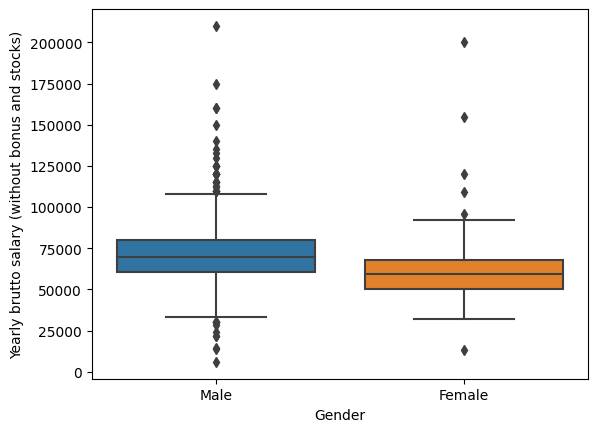

In [101]:
sns.boxplot(x='Gender', y='Yearly brutto salary (without bonus and stocks)', data=survey19)
plt.show()


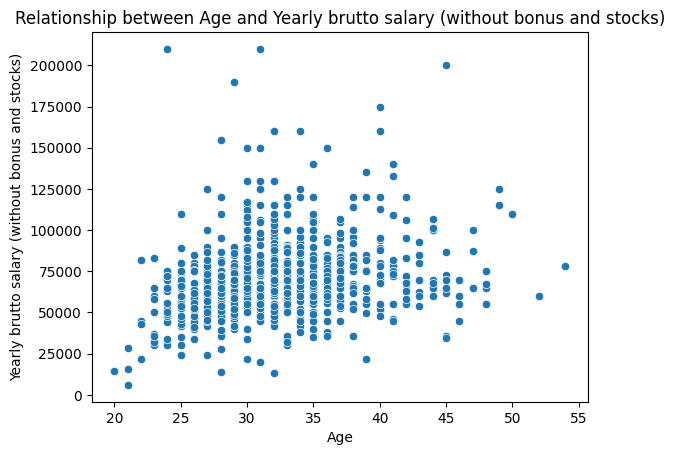

In [113]:
#Relationship between Age and Yearly brutto salary (without bonus and stocks)
sns.scatterplot(x='Age', y='Yearly brutto salary (without bonus and stocks)',data=survey19)
plt.title('Relationship between Age and Yearly brutto salary (without bonus and stocks)')
plt.show()
